In [38]:
import random

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Model

RANDOM_SEED = 2_055
IMG_SIZE = (8, 8, 1)

In [39]:
def create_model():
    input_layer = layers.Input(shape=IMG_SIZE)
    layer_conv1_1 = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        input_layer)
    layer_conv1_2 = layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv1_1)
    layer_pool1 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv1_2)

    layer_conv2_1 = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_pool1)
    layer_conv2_2 = layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv2_1)
    layer_pool2 = layers.MaxPool2D(pool_size=(2, 2))(layer_conv2_2)

    layer_conv3_1 = layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_pool2)
    layer_conv3_2 = layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
        layer_conv3_1)
    layer_flatten = layers.Flatten()(layer_conv3_2)

    dense_hidden1 = layers.Dense(32, activation='relu')(layer_flatten)
    dense_hidden2 = layers.Dense(64, activation='relu')(dense_hidden1)
    dense_hidden3 = layers.Dense(128, activation='relu')(dense_hidden2)

    dense_output = layers.Dense(10, activation='softmax')(dense_hidden3)

    model = Model(inputs=[input_layer], outputs=[dense_output])

    return model

In [40]:
def get_data():
    digit_dataset = load_digits()

    digit_data = digit_dataset.images
    digit_data = np.divide(digit_data, 255)  # Transform 0-255 to 0-1
    digit_data = np.expand_dims(digit_data, axis=-1)  # Add extra dimension to 2D image to make it 3D

    return digit_data, digit_dataset.target

In [41]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

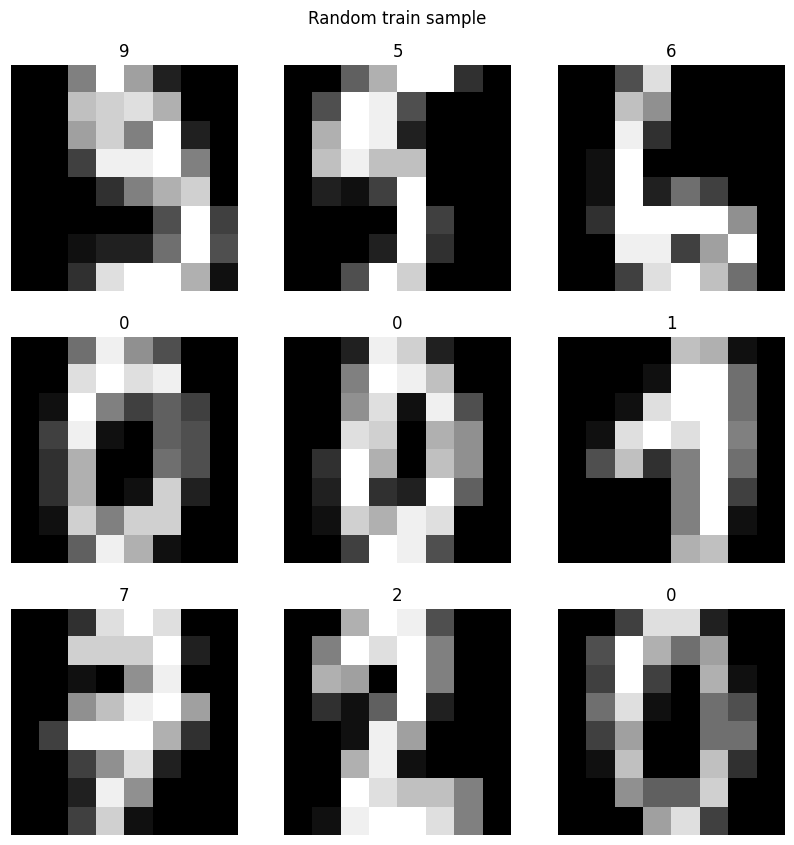

In [42]:
# Check data has been loaded property
plt.figure(figsize=(10, 10))
plt.title("Random train sample", pad=30)
plt.axis("off")

for i in range(9):
    random_num = random.randint(0, X_train.shape[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[random_num], cmap='gray')
    plt.title(y_train[random_num])
    plt.axis("off")

In [43]:
model_base = create_model()
model_base.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='digit_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=True)

history_model_base = model_base.fit(x=X_train,
                                    y=y_train,
                                    epochs=40,
                                    validation_data=(X_test, y_test),
                                    callbacks=[model_checkpoint_callback],
                                    verbose=True)

Epoch 1/40
40/40 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.0939
Epoch 1: val_accuracy improved from -inf to 0.09074, saving model to digit_model.h5
40/40 [==============================] - 6s 118ms/step - loss: 2.3036 - accuracy: 0.0939 - val_loss: 2.3039 - val_accuracy: 0.0907
Epoch 2/40
40/40 [==============================] - ETA: 0s - loss: 2.2625 - accuracy: 0.1074
Epoch 2: val_accuracy improved from 0.09074 to 0.15556, saving model to digit_model.h5
40/40 [==============================] - 5s 114ms/step - loss: 2.2625 - accuracy: 0.1074 - val_loss: 2.1205 - val_accuracy: 0.1556
Epoch 3/40
39/40 [============================>.] - ETA: 0s - loss: 2.0010 - accuracy: 0.2212
Epoch 3: val_accuracy improved from 0.15556 to 0.28704, saving model to digit_model.h5
40/40 [==============================] - 5s 113ms/step - loss: 2.0006 - accuracy: 0.2212 - val_loss: 1.8908 - val_accuracy: 0.2870
Epoch 4/40
39/40 [============================>.] - ETA: 0s - loss:

In [45]:
np.save('./history.npy', history_model_base.history)

In [78]:
# Método para la visualización de la exactitud obtenida durante el proceso de entrenamiento tanto en entrenamiento como en validación
def plot_losses(history):
    figure = plt.figure()
    axes = figure.add_subplot()
    axes.set_facecolor("#F0F7FF")
    axes.plot(history.history['loss'], label="Training", linestyle='dashed', color='#003B80')
    axes.plot(history.history['val_loss'], label="Validation", color='#003B80')
    axes.legend(loc="best")
    axes.set_ylabel('Loss')
    axes.set_xlabel('Epochs')
    axes.set_title('Loss during training')
    return figure


# Método para la visualización de la exactitud obtenida durante el proceso de entrenamiento tanto en entrenamiento como en validación
def plot_accuracy(history):
    figure = plt.figure()
    axes = figure.add_subplot()
    axes.set_facecolor("#F0F7FF")
    axes.plot(history.history['accuracy'], label="Training", linestyle='dashed', color='#003B80')
    axes.plot(history.history['val_accuracy'], label="Validation", color='#003B80')
    axes.legend(loc="best")
    axes.set_ylabel('Accuracy')
    axes.set_xlabel('Epochs')
    axes.set_title('Accuracy during training')
    return figure

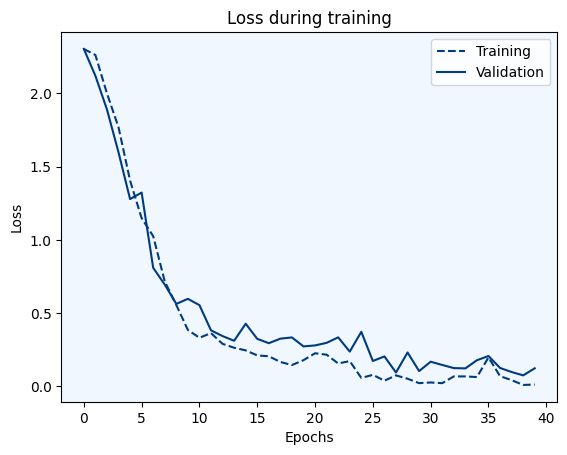

In [79]:
_ = plot_losses(history_model_base)

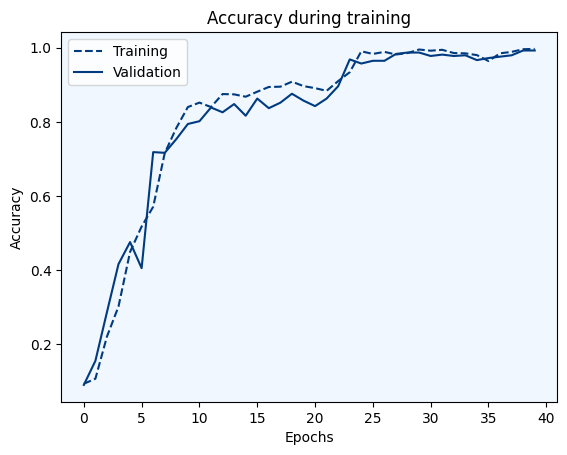

In [80]:
_ = plot_accuracy(history_model_base)